<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/XGBoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


In [1]:
pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned_Travel.csv')
df.head()

,Unnamed: 0,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,NumberOfPeopleVisited
0,0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [4]:
df.columns

Index(['Unnamed: 0', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'Designation', 'MonthlyIncome', 'NumberOfPeopleVisited'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
X = df.drop('ProdTaken', axis = 1)

In [7]:
y = df['ProdTaken']

In [8]:
category = X.select_dtypes(include = 'O').columns
numerical = X.select_dtypes(exclude = 'O').columns

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

SC = StandardScaler()
OHC = OneHotEncoder(drop = 'first')

preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder', OHC, category),
        ('StandardScaler', SC, numerical)
    ]
)

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)

In [11]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    'LR' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'NaiveB' : BernoulliNB(),
    'dtc' : DecisionTreeClassifier(),
    'rfc' : RandomForestClassifier(),
    'adb' : AdaBoostClassifier(),
    'gbc' : GradientBoostingClassifier(),
    'xgb' : XGBClassifier()
}

In [13]:
from sklearn.metrics import accuracy_score, \
confusion_matrix, classification_report, precision_recall_curve

for model_name, model in list(models.items()):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Evaluation of {model_name} model ")
  print('Accuracy : ', accuracy_score(y_test, y_pred))
  print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
  print('Classification : \n', classification_report(y_test, y_pred))
  print('precision_recall_curve : \n', precision_recall_curve(y_test, y_pred))
  print("\n *********************************************************\n")

Evaluation of LR model 
Accuracy :  0.8333333333333334
Confusion Matrix : 
 [[756  30]
 [133  59]]
Classification : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       786
           1       0.66      0.31      0.42       192

    accuracy                           0.83       978
   macro avg       0.76      0.63      0.66       978
weighted avg       0.81      0.83      0.81       978

precision_recall_curve : 
 (array([0.19631902, 0.66292135, 1.        ]), array([1.        , 0.30729167, 0.        ]), array([0, 1]))

 *********************************************************

Evaluation of KNN model 
Accuracy :  0.8987730061349694
Confusion Matrix : 
 [[772  14]
 [ 85 107]]
Classification : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       786
           1       0.88      0.56      0.68       192

    accuracy                           0.90       978
   macro avg       0.89 

In [14]:
params_rfc = {
    'n_estimators' : [50, 100, 150, 200],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,3,4,5,6,7],
    'class_weight' : ['balanced', 'balanced_subsample']
}
params_xgb = {
    'learning_rate' : [0.1, 0.01],
    'max_depth' : [5, 8, 12, 20, 30],
    'n_estimators' : [100, 200, 300],
    'colsample_bytree' : [0.5, 0.8, 1, 0.3, 0.4]
}

In [15]:
models = [
    ('rfc', RandomForestClassifier(), params_rfc),
    ('xgb', XGBClassifier(), params_xgb)
]

In [16]:
from math import e
from sklearn.model_selection import RandomizedSearchCV
for name, model, params in models:
  print(f'{name} is under going HP tunning')
  rscv = RandomizedSearchCV(estimator=model, \
                            param_distributions=params, n_jobs = -1, \
                            refit = True, cv = 5, scoring = 'accuracy')
  rscv.fit(X_train, y_train)
  print("Eval o/p")
  print(rscv.best_params_)
  print(rscv.best_score_)
  y_pred = rscv.predict(X_test)

  print(f"Evaluation of {name} model ")
  print('Accuracy : ', accuracy_score(y_test, y_pred))
  print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
  print('Classification : \n', classification_report(y_test, y_pred))
  print('precision_recall_curve : \n', precision_recall_curve(y_test, y_pred))
  print("\n ******************************************************\n")


rfc is under going HP tunning
Eval o/p
{'n_estimators': 150, 'max_depth': 7, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample'}
0.8468030690537084
Evaluation of rfc model 
Accuracy :  0.8578732106339468
Confusion Matrix : 
 [[701  85]
 [ 54 138]]
Classification : 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       786
           1       0.62      0.72      0.67       192

    accuracy                           0.86       978
   macro avg       0.77      0.81      0.79       978
weighted avg       0.87      0.86      0.86       978

precision_recall_curve : 
 (array([0.19631902, 0.61883408, 1.        ]), array([1.     , 0.71875, 0.     ]), array([0, 1]))

 ******************************************************

xgb is under going HP tunning
Eval o/p
{'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
0.9347826086956521
Evaluation of xgb model 
Accuracy :  0.943762781186094
Confusion Matr

In [23]:
model = XGBClassifier(n_estimators= 200, max_depth = 20, learning_rate = 0.1, colsample_bytree = 0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Evaluation of {model_name} model ")
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification : \n', classification_report(y_test, y_pred))
print('precision_recall_curve : \n', precision_recall_curve(y_test, y_pred))
print("\n *********************************************************\n")

Evaluation of xgb model 
Accuracy :  0.8866666666666667
Confusion Matrix : 
 [[134  11]
 [ 23 132]]
Classification : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       145
           1       0.92      0.85      0.89       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

precision_recall_curve : 
 (array([0.51666667, 0.92307692, 1.        ]), array([1.       , 0.8516129, 0.       ]), array([0, 1]))

 *********************************************************



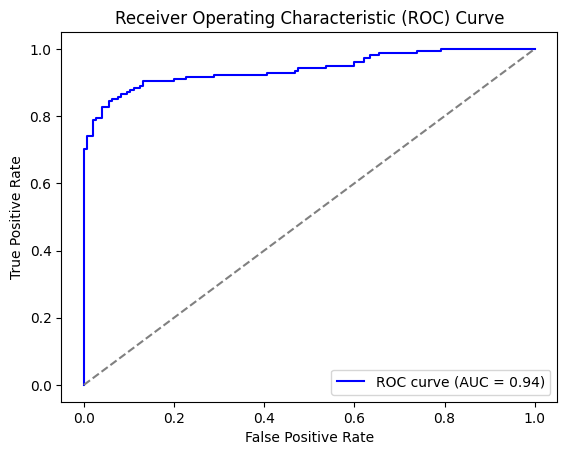

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
# y_pred = model.predict(X_test)
y_pred = model.predict_proba(X_test)[:, 1]
# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
